In [1]:
#Importing the necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
#load the data into dataframe
df = pd.read_csv('Walmart.csv')

In [3]:
#print the data
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
#print the shape of the dataset
df.shape

(6435, 8)

In [5]:
#copying the dataset
original_df = df.copy(deep=True)

In [6]:
# Convert the 'Date' column in the DataFrame 'df' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

C:\Users\kotas\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19-02-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\kotas\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '26-02-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\kotas\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19-03-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\kotas\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '26-03-2010' in DD/MM/YYYY format. Provide format or specif

In [7]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106


In [8]:
#adding new columns to the dataset
df['weekday'] = df.Date.dt.weekday
df['month'] = df.Date.dt.month
df['year'] = df.Date.dt.year

In [9]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,weekday,month,year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,6,5,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,3,12,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,4,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,4,2,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,0,5,2010


In [10]:
#printing the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
 8   weekday       6435 non-null   int64         
 9   month         6435 non-null   int64         
 10  year          6435 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(5)
memory usage: 553.1 KB


In [11]:
#Checking the descriptive statistics of the dataframe
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,weekday,month,year
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151,3.573427,6.475524,2010.965035
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885,1.426581,3.321797,0.797019
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000,0.000000,1.000000,2010.000000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000,4.000000,4.000000,2010.000000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000,4.000000,6.000000,2011.000000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000,4.000000,9.000000,2012.000000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000,6.000000,12.000000,2012.000000


In [12]:
#Displaying the null values
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
weekday         0
month           0
year            0
dtype: int64

In [13]:
# Count unique values in each column of the DataFrame 'df'
df.nunique().sort_values()

Holiday_Flag       2
year               3
weekday            7
month             12
Store             45
Date             143
Unemployment     349
Fuel_Price       892
CPI             2145
Temperature     3528
Weekly_Sales    6435
dtype: int64

C:\Users\kotas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


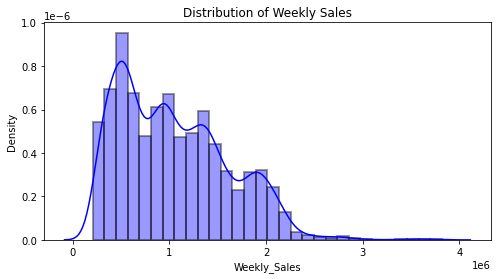

In [14]:
# Plot the distribution of 'Weekly_Sales' using a histogram and display the plot.
plt.figure(figsize=[8,4])
sns.distplot(df['Weekly_Sales'], color='b',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)
plt.title('Distribution of Weekly Sales')
plt.show()

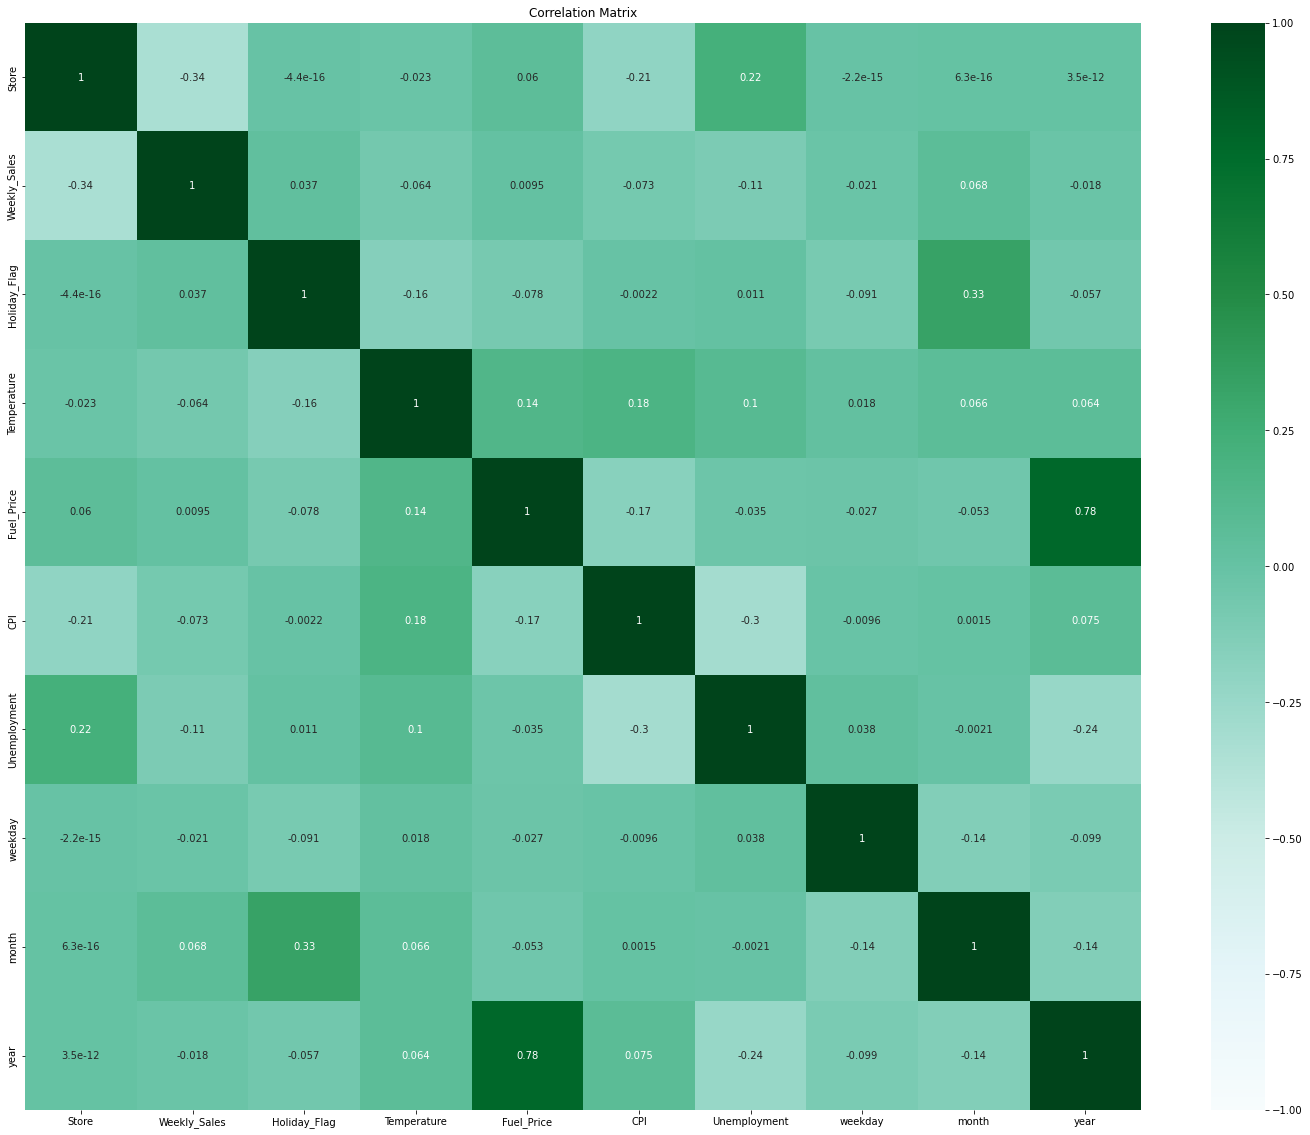

In [15]:
# Display the heatmap of the correlation matrix
plt.figure(figsize=[25,20])
sns.heatmap(df.corr(), annot=True,vmin=-1, vmax=1, center=0, cmap='BuGn')
plt.title('Correlation Matrix')
plt.show()

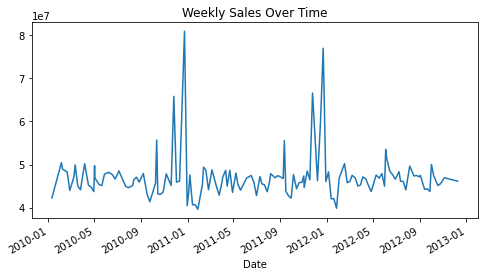

In [16]:
# Plot the total 'Weekly_Sales' over time as a line chart, grouping the sales by 'Date' to show trends.
plt.figure(figsize=[8,4])
df.groupby('Date')['Weekly_Sales'].sum().plot(kind='line', title='Weekly Sales Over Time')
plt.show()

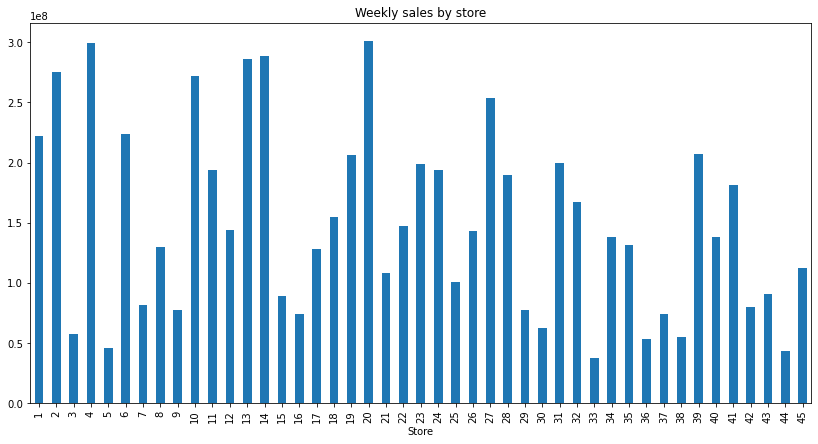

In [17]:
# Plot the total 'Weekly_Sales' by each 'Store' as a bar chart
plt.figure(figsize=[14,7]) 
df.groupby('Store')['Weekly_Sales'].sum().plot(kind='bar', title='Weekly sales by store') 
plt.show()

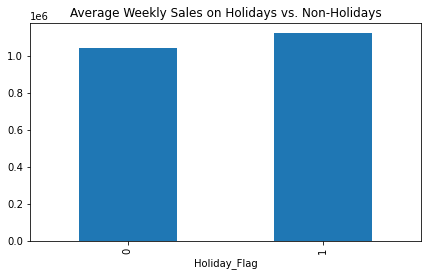

In [18]:
# Plot the average 'Weekly_Sales' for holiday and non-holiday weeks using a bar chart to compare sales impact.
plt.figure(figsize = [7,4])
df.groupby('Holiday_Flag')['Weekly_Sales'].mean().plot(kind='bar', title='Average Weekly Sales on Holidays vs. Non-Holidays')
plt.show()

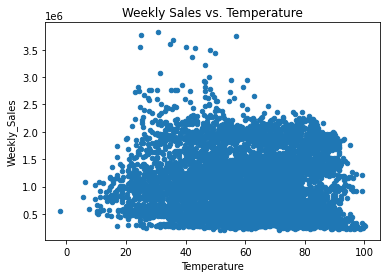

In [19]:
# Create a scatter plot to explore the relationship between 'Temperature' and 'Weekly_Sales'
df.plot(kind='scatter', x='Temperature', y='Weekly_Sales', title='Weekly Sales vs. Temperature')
plt.show()

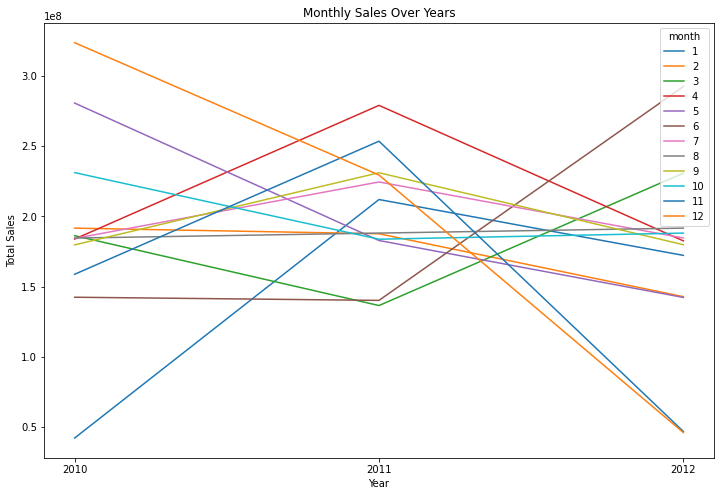

In [20]:
# Aggregate 'Weekly_Sales' by 'year' and 'month'
monthly_sales = df.groupby(['year', 'month'])['Weekly_Sales'].sum().unstack()

# Plot the data
monthly_sales.plot(kind='line', figsize=(12, 8))

# Set the title and labels
plt.title('Monthly Sales Over Years')
plt.xlabel('Year')
plt.ylabel('Total Sales')

# Adjust the x-axis ticks to show only the years
plt.xticks(ticks=monthly_sales.index, labels=monthly_sales.index)

# Show the plot
plt.show()

In [22]:
#copying the data
df3 = df.copy()

In [23]:
# Convert 'Holiday_Flag' into a dummy variable
df3 = pd.get_dummies(df3, drop_first=True, columns=['Holiday_Flag'], prefix = 'Holiday_Flag')
df3.rename(columns={'Holiday_Flag_1': 'Holiday_Flag'}, inplace=True)
print(df3)

df3.columns

      Store       Date  Weekly_Sales  Temperature  Fuel_Price         CPI  \
0         1 2010-05-02    1643690.90        42.31       2.572  211.096358   
1         1 2010-12-02    1641957.44        38.51       2.548  211.242170   
2         1 2010-02-19    1611968.17        39.93       2.514  211.289143   
3         1 2010-02-26    1409727.59        46.63       2.561  211.319643   
4         1 2010-05-03    1554806.68        46.50       2.625  211.350143   
...     ...        ...           ...          ...         ...         ...   
6430     45 2012-09-28     713173.95        64.88       3.997  192.013558   
6431     45 2012-05-10     733455.07        64.89       3.985  192.170412   
6432     45 2012-12-10     734464.36        54.47       4.000  192.327265   
6433     45 2012-10-19     718125.53        56.47       3.969  192.330854   
6434     45 2012-10-26     760281.43        58.85       3.882  192.308899   

      Unemployment  weekday  month  year  Holiday_Flag  
0            8.106

Index(['Store', 'Date', 'Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI',
       'Unemployment', 'weekday', 'month', 'year', 'Holiday_Flag'],
      dtype='object')

In [24]:
#dropping the date feature
df3.drop(['Date'], inplace = True, axis = 1)
print(df3)

      Store  Weekly_Sales  Temperature  Fuel_Price         CPI  Unemployment  \
0         1    1643690.90        42.31       2.572  211.096358         8.106   
1         1    1641957.44        38.51       2.548  211.242170         8.106   
2         1    1611968.17        39.93       2.514  211.289143         8.106   
3         1    1409727.59        46.63       2.561  211.319643         8.106   
4         1    1554806.68        46.50       2.625  211.350143         8.106   
...     ...           ...          ...         ...         ...           ...   
6430     45     713173.95        64.88       3.997  192.013558         8.684   
6431     45     733455.07        64.89       3.985  192.170412         8.667   
6432     45     734464.36        54.47       4.000  192.327265         8.667   
6433     45     718125.53        56.47       3.969  192.330854         8.667   
6434     45     760281.43        58.85       3.882  192.308899         8.667   

      weekday  month  year  Holiday_Fla

In [25]:
#concatenate the modified DataFrame with new dummy variables
df3 = pd.concat([df3.drop(['year','Weekly_Sales','Temperature','Fuel_Price','CPI','Unemployment','Holiday_Flag','weekday','month','Store'], axis=1), 
                 pd.DataFrame(pd.get_dummies(df3, columns=['year','weekday','month','Store'], drop_first=True))],axis=1)


In [28]:
#Removal of outlier:
df1 = df3.copy()

features = ['Unemployment', 'Fuel_Price', 'CPI', 'Temperature']

for i in features:
    Q1 = df1[i].quantile(0.25)
    Q3 = df1[i].quantile(0.75)
    IQR = Q3 - Q1
    df1 = df1[df1[i] <= (Q3+(1.5*IQR))]
    df1 = df1[df1[i] >= (Q1-(1.5*IQR))]
    df1 = df1.reset_index(drop=True)
display(df1.head())

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Holiday_Flag,year_2011,year_2012,weekday_1,weekday_2,...,Store_36,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45
0,1643690.90,42.31,2.572,211.096358,8.106,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1641957.44,38.51,2.548,211.242170,8.106,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1611968.17,39.93,2.514,211.289143,8.106,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1409727.59,46.63,2.561,211.319643,8.106,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1554806.68,46.50,2.625,211.350143,8.106,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
df = df1.copy()

In [30]:
#Splitting the data intro training & testing sets
X = df.drop('Weekly_Sales',axis=1)
Y = df['Weekly_Sales']
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=100)
Train_X.reset_index(drop=True,inplace=True)

In [31]:
# Initialize the StandardScaler to standardize features
std = StandardScaler()

# Fit the scaler to the training data and transform it
print('\033[1mStandardardization on Training set'.center(120))
Train_X_std = std.fit_transform(Train_X)
Train_X_std = pd.DataFrame(Train_X_std, columns=X.columns)
display(Train_X_std.describe())

# Transform the testing data using the already fitted scaler
print('\n','\033[1mStandardardization on Testing set'.center(120))
Test_X_std = std.transform(Test_X)
Test_X_std = pd.DataFrame(Test_X_std, columns=X.columns)
display(Test_X_std.describe())

                                         Standardardization on Training set                                         


,Temperature,Fuel_Price,CPI,Unemployment,Holiday_Flag,year_2011,year_2012,weekday_1,weekday_2,weekday_3,...,Store_36,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45
count,4.762000e+03,4.762000e+03,4.762000e+03,4.762000e+03,4.762000e+03,4.762000e+03,4.762000e+03,4.762000e+03,4.762000e+03,4.762000e+03,...,4.762000e+03,4.762000e+03,4.762000e+03,4.762000e+03,4.762000e+03,4.762000e+03,4.762000e+03,4.762000e+03,4.762000e+03,4.762000e+03
mean,-1.494674e-16,-3.367039e-16,-2.799804e-16,-4.039888e-16,-1.741339e-16,3.964583e-16,3.839385e-16,-3.934507e-16,1.890317e-16,3.962484e-16,...,-4.515031e-16,-6.241216e-16,-1.086772e-15,-6.947287e-16,-2.611192e-17,3.944649e-16,-1.004738e-15,5.259687e-16,6.589880e-16,6.687683e-17
std,1.000105e+00,1.000105e+00,1.000105e+00,1.000105e+00,1.000105e+00,1.000105e+00,1.000105e+00,1.000105e+00,1.000105e+00,1.000105e+00,...,1.000105e+00,1.000105e+00,1.000105e+00,1.000105e+00,1.000105e+00,1.000105e+00,1.000105e+00,1.000105e+00,1.000105e+00,1.000105e+00
min,-2.961575e+00,-1.871814e+00,-1.248731e+00,-2.762670e+00,-2.742012e-01,-7.526270e-01,-6.371530e-01,-2.588345e-01,-1.157891e-01,-2.719813e-01,...,-1.573123e-01,-1.587085e-01,-4.351484e-02,-1.580118e-01,-1.307162e-01,-1.537717e-01,-1.573123e-01,-1.628322e-01,-1.551967e-01,-1.523346e-01
25%,-7.314248e-01,-9.886990e-01,-1.076949e+00,-6.783836e-01,-2.742012e-01,-7.526270e-01,-6.371530e-01,-2.588345e-01,-1.157891e-01,-2.719813e-01,...,-1.573123e-01,-1.587085e-01,-4.351484e-02,-1.580118e-01,-1.307162e-01,-1.537717e-01,-1.573123e-01,-1.628322e-01,-1.551967e-01,-1.523346e-01
50%,1.062547e-01,1.663112e-01,3.842133e-01,9.596435e-02,-2.742012e-01,-7.526270e-01,-6.371530e-01,-2.588345e-01,-1.157891e-01,-2.719813e-01,...,-1.573123e-01,-1.587085e-01,-4.351484e-02,-1.580118e-01,-1.307162e-01,-1.537717e-01,-1.573123e-01,-1.628322e-01,-1.551967e-01,-1.523346e-01
75%,7.731979e-01,8.427860e-01,9.933828e-01,6.138095e-01,-2.742012e-01,1.328679e+00,1.569482e+00,-2.588345e-01,-1.157891e-01,-2.719813e-01,...,-1.573123e-01,-1.587085e-01,-4.351484e-02,-1.580118e-01,-1.307162e-01,-1.537717e-01,-1.573123e-01,-1.628322e-01,-1.551967e-01,-1.523346e-01
max,2.170008e+00,2.469806e+00,1.340791e+00,2.575491e+00,3.646958e+00,1.328679e+00,1.569482e+00,3.863473e+00,8.636394e+00,3.676723e+00,...,6.356783e+00,6.300861e+00,2.298067e+01,6.328643e+00,7.650163e+00,6.503146e+00,6.356783e+00,6.141290e+00,6.443435e+00,6.564495e+00



                                          Standardardization on Testing set                                          


,Temperature,Fuel_Price,CPI,Unemployment,Holiday_Flag,year_2011,year_2012,weekday_1,weekday_2,weekday_3,...,Store_36,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45
count,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,...,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000,1191.000000
mean,0.044406,0.075113,0.021041,-0.050953,0.005646,0.052984,0.065042,0.007679,0.038532,0.026409,...,-0.004168,-0.017693,0.111140,-0.010959,-0.000055,0.030677,-0.004168,-0.056970,0.016556,0.045053
std,1.000220,0.971917,1.004644,1.010206,1.009885,1.014188,1.028250,1.014142,1.152364,1.044095,...,0.987401,0.944330,1.881448,0.965939,1.000214,1.093088,0.987401,0.810380,1.051077,1.134875
min,-2.857425,-1.780457,-1.248731,-2.762670,-0.274201,-0.752627,-0.637153,-0.258834,-0.115789,-0.271981,...,-0.157312,-0.158708,-0.043515,-0.158012,-0.130716,-0.153772,-0.157312,-0.162832,-0.155197,-0.152335
25%,-0.657516,-0.852751,-1.077025,-0.699355,-0.274201,-0.752627,-0.637153,-0.258834,-0.115789,-0.271981,...,-0.157312,-0.158708,-0.043515,-0.158012,-0.130716,-0.153772,-0.157312,-0.162832,-0.155197,-0.152335
50%,0.187351,0.298996,0.393492,0.058860,-0.274201,-0.752627,-0.637153,-0.258834,-0.115789,-0.271981,...,-0.157312,-0.158708,-0.043515,-0.158012,-0.130716,-0.153772,-0.157312,-0.162832,-0.155197,-0.152335
75%,0.818764,0.844961,1.019967,0.611390,-0.274201,1.328679,1.569482,-0.258834,-0.115789,-0.271981,...,-0.157312,-0.158708,-0.043515,-0.158012,-0.130716,-0.153772,-0.157312,-0.162832,-0.155197,-0.152335
max,2.035481,2.469806,1.345814,2.575491,3.646958,1.328679,1.569482,3.863473,8.636394,3.676723,...,6.356783,6.300861,22.980668,6.328643,7.650163,6.503146,6.356783,6.141290,6.443435,6.564495


In [34]:
# Initialize and fit a PCA model to the standardized training data
pca = PCA().fit(Train_X_std)


# Calculate cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Determine the number of components to explain 95% of the variance
k = np.where(cumulative_variance >= 0.95)[0][0] + 1 

print(f"Number of components to explain 95% of variance: {k}")

Number of components to explain 95% of variance: 58


In [35]:
# Assuming k is the number of components determined from cumulative variance
pca = PCA(n_components=k)

# Fit and transform training data
Train_X_std_pca = pca.fit_transform(Train_X_std)  
Test_X_std_pca = pca.transform(Test_X_std) 

In [36]:
# Initialize a Linear Regression model
LR = LinearRegression()
LR.fit(Train_X_std_pca, Train_Y)

# Predict the training set and test set outcomes using the fitted model
pred_train = LR.predict(Train_X_std_pca)
pred_test = LR.predict(Test_X_std_pca)

In [37]:
# Calculate metrics for the training set
train_r2 = r2_score(Train_Y, pred_train)
train_mse = mean_squared_error(Train_Y, pred_train)
train_rmse = np.sqrt(train_mse)

# Calculate metrics for the testing set
test_r2 = r2_score(Test_Y, pred_test)
test_mse = mean_squared_error(Test_Y, pred_test)
test_rmse = np.sqrt(test_mse)

# Create a DataFrame to hold the evaluation metrics
evaluation_metrics = pd.DataFrame({
    'Metric': ['R2 Score', 'MSE', 'RMSE'],
    'Training Set': [train_r2, train_mse, train_rmse],
    'Testing Set': [test_r2, test_mse, test_rmse]
})

# Display the DataFrame
print("Model Evaluation Metrics:")
display(evaluation_metrics)

Model Evaluation Metrics:


,Metric,Training Set,Testing Set
0,R2 Score,9.030686e-01,9.051977e-01
1,MSE,3.137011e+10,3.242695e+10
2,RMSE,1.771161e+05,1.800749e+05


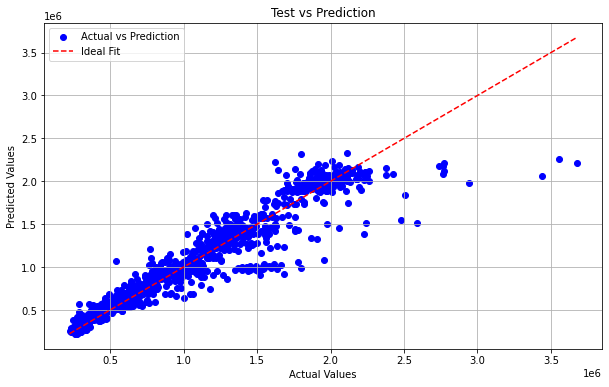

In [38]:
# Plot a scatter graph of actual vs. predicted values for the test set.
plt.figure(figsize=(10, 6))
plt.scatter(Test_Y, pred_test, color='blue', label='Actual vs Prediction')
plt.plot([Test_Y.min(), Test_Y.max()], [Test_Y.min(), Test_Y.max()], 'r--', label='Ideal Fit')
plt.title('Test vs Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

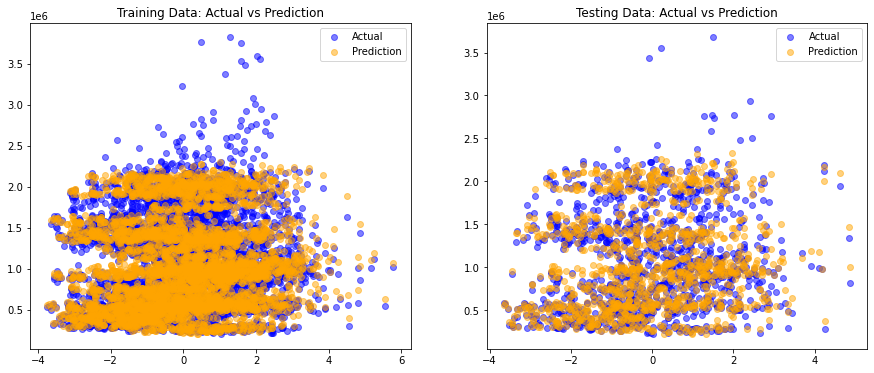

In [39]:
# Plotting training data
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.scatter(Train_X_std_pca[:, 0], Train_Y, color='blue', label='Actual', alpha=0.5)
plt.scatter(Train_X_std_pca[:, 0], pred_train, color='orange', label='Prediction', alpha=0.5)
plt.title('Training Data: Actual vs Prediction')
plt.legend()

# Plotting testing data
plt.subplot(1, 2, 2)
plt.scatter(Test_X_std_pca[:, 0], Test_Y, color='blue', label='Actual', alpha=0.5)
plt.scatter(Test_X_std_pca[:, 0], pred_test, color='orange', label='Prediction', alpha=0.5)
plt.title('Testing Data: Actual vs Prediction')
plt.legend()

plt.show()

In [47]:
# Set the degree of the Polynomial
degree = 2 

# Create a pipeline that creates polynomial features and then fits a linear regression mode
poly_reg_model = Pipeline([
    ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
    ('feature_selection', SelectKBest(f_regression, k=50)),  # Select the top 50 features
    ('linear', LinearRegression())
])


# Fit the model
poly_reg_model.fit(Train_X_std_pca, Train_Y)


# Make predictions
pred_train = poly_reg_model.predict(Train_X_std_pca)
pred_test = poly_reg_model.predict(Test_X_std_pca)

# Calculate metrics for the training set
train_r2 = r2_score(Train_Y, pred_train)
train_mse = mean_squared_error(Train_Y, pred_train)
train_rmse = np.sqrt(train_mse)

# Calculate metrics for the testing set
test_r2 = r2_score(Test_Y, pred_test)
test_mse = mean_squared_error(Test_Y, pred_test)
test_rmse = np.sqrt(test_mse)

# Create a DataFrame to hold the evaluation metrics
evaluation_metrics = pd.DataFrame({
    'Metric': ['R2 Score', 'MSE', 'RMSE'],
    'Training Set': [train_r2, train_mse, train_rmse],
    'Testing Set': [test_r2, test_mse, test_rmse]
})

# Display the DataFrame
print("Model Evaluation Metrics:")
display(evaluation_metrics)


Model Evaluation Metrics:


,Metric,Training Set,Testing Set
0,R2 Score,8.707949e-01,8.700486e-01
1,MSE,4.181493e+10,4.444962e+10
2,RMSE,2.044870e+05,2.108308e+05


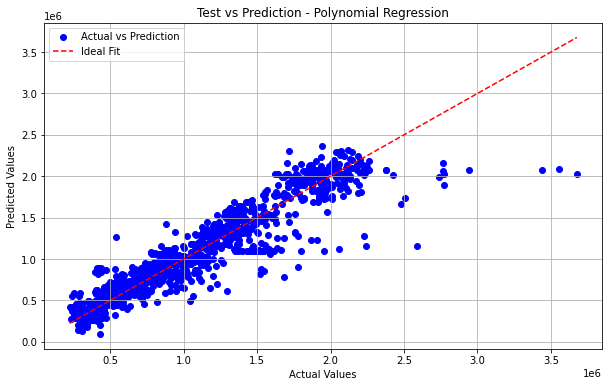

In [48]:
# Visualizing the Test vs Prediction for Polynomial Regression
plt.figure(figsize=(10, 6))
plt.scatter(Test_Y, pred_test, color='blue', label='Actual vs Prediction')
plt.plot([Test_Y.min(), Test_Y.max()], [Test_Y.min(), Test_Y.max()], 'r--', label='Ideal Fit')
plt.title('Test vs Prediction - Polynomial Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

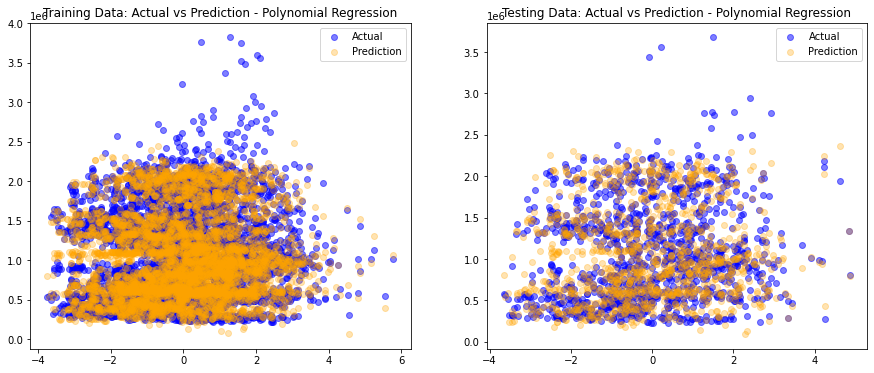

In [49]:
# Visual comparison of actual and predicted values in polynomial regression in training data
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.scatter(Train_X_std_pca[:, 0], Train_Y, color='blue', label='Actual', alpha=0.5)
plt.scatter(Train_X_std_pca[:, 0], pred_train, color='orange', label='Prediction', alpha=0.3)
plt.title('Training Data: Actual vs Prediction - Polynomial Regression')
plt.legend()


# Visual comparison of actual and predicted values in polynomial regression in test data
plt.subplot(1, 2, 2)
plt.scatter(Test_X_std_pca[:, 0], Test_Y, color='blue', label='Actual', alpha=0.5)
plt.scatter(Test_X_std_pca[:, 0], pred_test, color='orange', label='Prediction', alpha=0.3)
plt.title('Testing Data: Actual vs Prediction - Polynomial Regression')
plt.legend()

plt.show()
